Use GA search (using pygad) to find the minimum of the real-valued function f(x) = abs(x) + cos(x). Restrict the search interval to [-20, 20]. Carefully define the fitness function since pygad can only maximize it!

$$ f(x) = |x| + cos(x) $$

In [1]:
import pygad
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 

In [10]:
def f(x):
    y = abs(x) + np.cos(x)
    return(y)

In [15]:
def fitness_function(ga_instance, solution, solution_idx):
    return -f(solution)[0]   # solution is a numpy array with length 1. We return it as a scalar value

In [13]:
gene_space = {'low': -20, 'high': 20}

In [16]:
ga_instance = pygad.GA(fitness_func=fitness_function,
                       num_generations=100,                       # number of generations
                       num_parents_mating=10,                     # number of parents selected for mutation/crossover
                       sol_per_pop=20,                            # population size
                       num_genes=1,
                       gene_space=gene_space,)                               # length of the population vector
ga_instance.run(),

ga_instance.best_solution()

(array([-0.00932314]), -1.009279682867682, 0)

Use GA search to find the minimum of the real-valued two-dimensional function f(x1, x2) = 20 + x1^2 + x2^2 - 10 * (cos(2 * pi * x1) + cos(2 * pi * x2)), where x1 and x2 are from the interval [-5.12, 5.12].

$$ f(x_1, x_2) = 20 + x_1^2 + x_2^2 - 10 (cos(2 \pi x_1) + cos(2 \pi x_2)) $$

In [30]:
def g(x):
    y = 20 + x[0]**2 + x[1]**2 - 10*(np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))
    return(y)

In [27]:
def fitness_function2(ga_instance, solution, solution_idx):
    return -g(solution) 

In [23]:
gene_space2 = {'low': -5.12, 'high': 5.12}

In [31]:
ga_instance = pygad.GA(fitness_func=fitness_function2,
                       num_generations=100,                       # number of generations
                       num_parents_mating=10,                     # number of parents selected for mutation/crossover
                       sol_per_pop=20,                            # population size
                       num_genes=2,
                       gene_space=gene_space2,)                               # length of the population vector
ga_instance.run(),

ga_instance.best_solution()

(array([-0.02101796,  1.0017244 ]), -1.0915526658893704, 0)

We are given the following data:

substrate = [1.73, 2.06, 2.20, 4.28, 4.44, 5.53, 6.32, 6.68, 7.28, 7.90, 8.80, 9.14, 9.18, 9.40, 9.88]

Velocity  = [12.48, 13.97, 14.59, 21.25, 21.66, 21.97, 25.36, 22.93, 24.81, 25.63, 24.68, 29.04, 28.08, 27.32, 27.77]

Use GA search to fit the data to the model: Velocity = (M * Substrate) / (K + Substrate), where M and K are the model parameters. Restrict the search interval for M to [40.0, 50.0] and for K to [3.0, 5.0].

In [40]:
substrate = np.array([1.73, 2.06, 2.20, 4.28, 4.44, 5.53, 6.32, 6.68, 7.28, 7.90, 8.80, 9.14, 9.18, 9.40, 9.88])

Velocity = np.array([12.48, 13.97, 14.59, 21.25, 21.66, 21.97, 25.36, 22.93, 24.81, 25.63, 24.68, 29.04, 28.08, 27.32, 27.77])

In [42]:
def model(param):
    return(param[0] * substrate)/(param[1] + substrate)

In [43]:
def myFitness2(ga_instance, solution, solution_idx): 
    return -np.sum((Velocity - model(solution))**2)

In [44]:
gene_space3 =  [{'low': 40.0, 'high': 50.0}, {'low': 3.0, 'high': 5.0}]

In [45]:
ga_instance = pygad.GA(fitness_func=myFitness2,
                       num_generations=500, 
                       num_parents_mating=10,
                       sol_per_pop=1000,
                       num_genes=2,                   # Each solution should have 3 genes
                       stop_criteria= "saturate_10",   # Stop if fitness does not change for 7 iterations
                       crossover_type="uniform",      # We can select different crossover/mutation types
                       gene_space=gene_space3          # Use the gene space defined earlier
                      )

ga_instance.run()
ga_instance.best_solution()

(array([40.00034046,  4.14361623]), -18.698961836379844, 0)

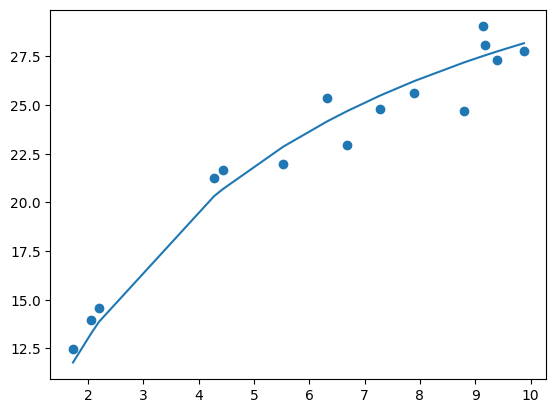

In [46]:
plt.scatter(substrate, Velocity)
plt.plot(substrate, model(ga_instance.best_solution()[0]))